In [9]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
import sys
sys.path.append("../perf-module")

In [11]:
from PerfParser import PerfParser, StatMode, Compiler
from Preprocessor import Preprocessor
from FunctionMap import FunctionMap

In [12]:
perf_dir = "perf-report/"
stdout_dir = "stdout/valid/"
category_to_file_path = "tags/category_to_file.json"
tags_path = "tags/tags.json"

In [13]:
preprocessor = Preprocessor(stdout_dir="stdout/")
preprocessor.filter_stdout()

In [14]:
function_map = FunctionMap(category_to_file_path=category_to_file_path, tags_path=tags_path)
perf_parser = PerfParser(
    compiler=Compiler.C2D,
    function_map=function_map,
    perf_dir=perf_dir,
    stdout_dir=stdout_dir,
    normalize=False
)

Initializing CNF Stats...:   0%|          | 0/565 [00:00<?, ?it/s]

Initializing CNF Stats...: 100%|██████████| 565/565 [00:07<00:00, 78.05it/s]

Aggregating Stats for all CNFs...
Total time: 746361.7
Aggregating Stats for timed out CNFs...
Total time: 666000
Aggregating Stats for completed CNFs...
Total time: 80361.7
Aggregating Stats by Category for all CNFs...
Aggregating Stats by Category for timed out CNFs...
Aggregating Stats by Category for completed CNFs...


In [15]:
json_out = "stats/cnf_stats.json"
agg_json_out = "stats/unnorm_agg_cnf_stats.json"
cat_json_out = "stats/unnorm_category_stats.json"

# timed out
timed_out_json_out = "stats/timed_out/cnf_stats.json"
timed_out_agg_json_out = "stats/timed_out/unnorm_agg_stats.json" 
timed_out_cat_json_out = "stats/timed_out/unnorm_category_stats.json"

# complete
completed_json_out = "stats/completed/cnf_stats.json"
completed_agg_json_out = "stats/completed/unnorm_agg_stats.json"
completed_cat_json_out = "stats/completed/unnorm_category_stats.json"

perf_parser.to_json(json_out, StatMode.CNF_STATS)
perf_parser.to_json(agg_json_out, StatMode.AGGREGATE_STATS)
perf_parser.to_json(cat_json_out, StatMode.CATEGORY_STATS)

# timed out
perf_parser.to_json(timed_out_json_out, StatMode.TIMED_OUT_STATS)
perf_parser.to_json(timed_out_agg_json_out, StatMode.AGGREGATE_TIMED_OUT_STATS)
perf_parser.to_json(timed_out_cat_json_out, StatMode.CATEGORY_TIMED_OUT_STATS)

# completed
perf_parser.to_json(completed_json_out, StatMode.COMPLETED_STATS)
perf_parser.to_json(completed_agg_json_out, StatMode.AGGREGATE_COMPLETED_STATS)
perf_parser.to_json(completed_cat_json_out, StatMode.CATEGORY_COMPLETED_STATS)

In [16]:
from PerfTableGenerator import PerfTableGenerator

table_generator = PerfTableGenerator(
    agg_stats_path=agg_json_out,
    category_stats_path=cat_json_out
)

In [19]:
function_table = table_generator.generate_function_table_latex()
print(function_table)

\begin{tabular}{llll}
\toprule
Function Name & Category & Total Time & Percent Time \\
\midrule
remove\_watched\_clause & sat & 202194.57 & 27.09 \\
set\_literal & sat & 145049.25 & 19.43 \\
update\_relevance\_bit & cache & 57403.10 & 7.69 \\
subsumed\_dtree & dtree & 35408.40 & 4.74 \\
add\_watched\_clause & sat & 32456.41 & 4.35 \\
same\_and\_nodes & nnf & 31164.65 & 4.18 \\
pack\_var\_2bits & cache & 29874.76 & 4.00 \\
update\_subsumption & sat & 25310.83 & 3.39 \\
eliminated & compile & 23427.83 & 3.14 \\
erase\_level & sat & 20685.18 & 2.77 \\
update\_separator\_score & compile & 14713.47 & 1.97 \\
same\_or\_nodes & nnf & 10203.06 & 1.37 \\
apply\_to\_vars & cache & 9809.86 & 1.31 \\
lookup\_cnf\_cache & cache & 9206.92 & 1.23 \\
get\_and\_node & nnf & 7409.17 & 0.99 \\
push\_items\_to\_end & compile & 5640.41 & 0.76 \\
nnf\_node\_cmp & nnf & 5160.44 & 0.69 \\
subs\_cls & compile & 5039.05 & 0.68 \\
move\_watched\_literal & sat & 4904.97 & 0.66 \\
compile\_decomposed & compile & 3

In [20]:
category_table = table_generator.generate_category_table_latex()
print(category_table)

\begin{tabular}{lll}
\toprule
Category & Total Time & Percent Time \\
\midrule
sat & 435658.53 & 60.97 \\
cache & 115699.42 & 16.19 \\
nnf & 66641.24 & 9.33 \\
compile & 58853.95 & 8.24 \\
dtree & 37615.68 & 5.26 \\
\bottomrule
\end{tabular}



In [21]:
timed_out_table_generator = PerfTableGenerator(
    agg_stats_path=timed_out_agg_json_out,
    category_stats_path=timed_out_cat_json_out
)

In [22]:
timed_out_function_table = timed_out_table_generator.generate_function_table_latex()
print(timed_out_function_table)

\begin{tabular}{llll}
\toprule
Function Name & Category & Total Time & Percent Time \\
\midrule
remove\_watched\_clause & sat & 189743.04 & 28.49 \\
set\_literal & sat & 134053.20 & 20.13 \\
update\_relevance\_bit & cache & 48901.32 & 7.34 \\
subsumed\_dtree & dtree & 31013.28 & 4.66 \\
add\_watched\_clause & sat & 30278.88 & 4.55 \\
same\_and\_nodes & nnf & 26060.76 & 3.91 \\
pack\_var\_2bits & cache & 25732.44 & 3.86 \\
update\_subsumption & sat & 21814.56 & 3.28 \\
eliminated & compile & 20765.16 & 3.12 \\
erase\_level & sat & 17318.88 & 2.60 \\
update\_separator\_score & compile & 12819.24 & 1.92 \\
same\_or\_nodes & nnf & 8593.92 & 1.29 \\
apply\_to\_vars & cache & 8363.88 & 1.26 \\
lookup\_cnf\_cache & cache & 6868.08 & 1.03 \\
get\_and\_node & nnf & 5688.36 & 0.85 \\
push\_items\_to\_end & compile & 4738.32 & 0.71 \\
move\_watched\_literal & sat & 4543.20 & 0.68 \\
subs\_cls & compile & 4120.56 & 0.62 \\
nnf\_node\_cmp & nnf & 3981.24 & 0.60 \\
compile\_decomposed & compile & 31

In [23]:
timed_out_category_table = timed_out_table_generator.generate_category_table_latex()
print(timed_out_category_table)

\begin{tabular}{lll}
\toprule
Category & Total Time & Percent Time \\
\midrule
sat & 402135.48 & 63.10 \\
cache & 97524.72 & 15.30 \\
nnf & 54186.48 & 8.50 \\
compile & 50628.24 & 7.94 \\
dtree & 32854.32 & 5.15 \\
\bottomrule
\end{tabular}



In [24]:
completed_table_generator = PerfTableGenerator(
    agg_stats_path=completed_agg_json_out,
    category_stats_path=completed_cat_json_out
)

In [25]:
completed_function_table = completed_table_generator.generate_function_table_latex()
print(completed_function_table)

\begin{tabular}{llll}
\toprule
Function Name & Category & Total Time & Percent Time \\
\midrule
remove\_watched\_clause & sat & 12451.53 & 15.49 \\
set\_literal & sat & 10996.05 & 13.68 \\
update\_relevance\_bit & cache & 8501.78 & 10.58 \\
same\_and\_nodes & nnf & 5103.89 & 6.35 \\
subsumed\_dtree & dtree & 4395.12 & 5.47 \\
pack\_var\_2bits & cache & 4142.32 & 5.15 \\
update\_subsumption & sat & 3496.27 & 4.35 \\
erase\_level & sat & 3366.30 & 4.19 \\
eliminated & compile & 2662.67 & 3.31 \\
lookup\_cnf\_cache & cache & 2338.84 & 2.91 \\
add\_watched\_clause & sat & 2177.53 & 2.71 \\
update\_separator\_score & compile & 1894.23 & 2.36 \\
get\_and\_node & nnf & 1720.81 & 2.14 \\
same\_or\_nodes & nnf & 1609.14 & 2.00 \\
apply\_to\_vars & cache & 1445.98 & 1.80 \\
nnf\_node\_cmp & nnf & 1179.20 & 1.47 \\
subs\_cls & compile & 918.49 & 1.14 \\
push\_items\_to\_end & compile & 902.09 & 1.12 \\
conjoin\_relevant\_lits & nnf & 628.71 & 0.78 \\
compile\_decomposed & compile & 622.66 & 0.77 

In [26]:
completed_category_table = completed_table_generator.generate_category_table_latex()
print(completed_category_table)

\begin{tabular}{lll}
\toprule
Category & Total Time & Percent Time \\
\midrule
sat & 33523.05 & 43.45 \\
cache & 18174.70 & 23.56 \\
nnf & 12454.76 & 16.14 \\
compile & 8225.71 & 10.66 \\
dtree & 4761.36 & 6.17 \\
hdtree & 14.20 & 0.02 \\
\bottomrule
\end{tabular}



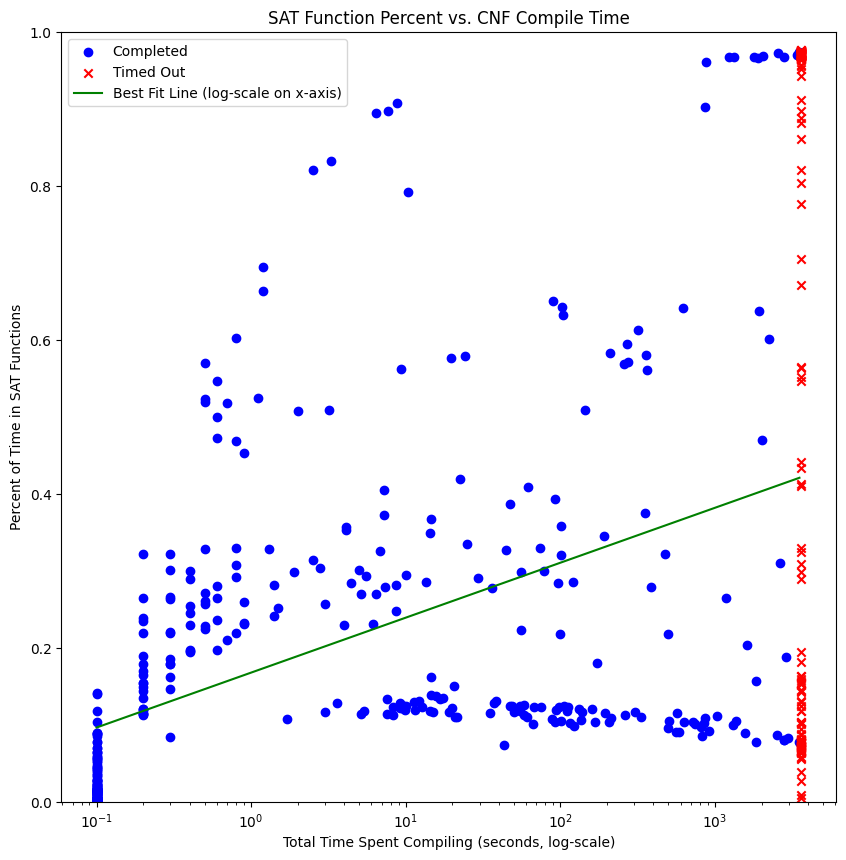

In [27]:
from SatPlotter import SatPlotter

sat_plotter = SatPlotter(cnf_stats_path=json_out)
sat_plotter.plot_sat_time_percent()